<a href="https://colab.research.google.com/github/visiont3lab/tecnologie_data_science/blob/master/book/docs/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

**Importante**
>Questo notebook si basa su: [Python Data Science Hanbook](https://github.com/jakevdp/PythonDataScienceHandbook) [Principal-Component-Analysis.ipynb](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb#scrollTo=D3uO08ItdhmY)

**Extra: Esempi interessanti**
* [Dash app mnist](https://dash-gallery.plotly.host/dash-mnist-explorer/)
* [Dash app tnse](https://dash-gallery.plotly.host/dash-tsne/)

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction 



In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Introduzione

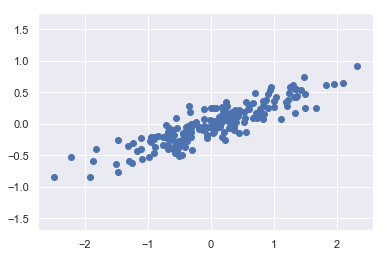

In [5]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

The unsupervised learning problem attempts to learn about the *relationship* between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.
Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [8]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

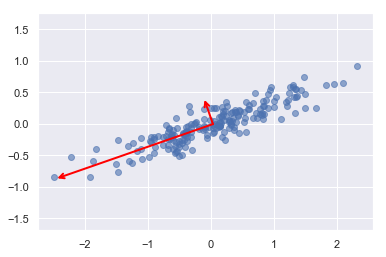

In [9]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    color="red",
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "principal components" of the data.

This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.

## PCA as Dimensionality Reduction

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.
To see this, let's take a quick look at the application of PCA to the digits data we saw in [In-Depth: Decision Trees and Random Forests](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb).

### Load Datasets

In [21]:
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
import tensorflow as tf # https://keras.io/api/datasets/

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html#sklearn.datasets.fetch_lfw_people
data_lfw = fetch_lfw_people(min_faces_per_person=60) # Image shape: 62x47

#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits
data_dig = load_digits() # Image Shape: 8x8

# Fashion Mnist 
data_fash_mnist = tf.keras.datasets.fashion_mnist.load_data()

# Mnist
data_mnist = tf.keras.datasets.mnist.load_data()

# Cifar10
data_cifar10 = tf.keras.datasets.cifar10.load_data()


In [11]:
def print_dataset(X, name):
    fig, axes = plt.subplots(3, 8, figsize=(12, 6),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle(name + " " + str(X.shape))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[i], cmap='bone')

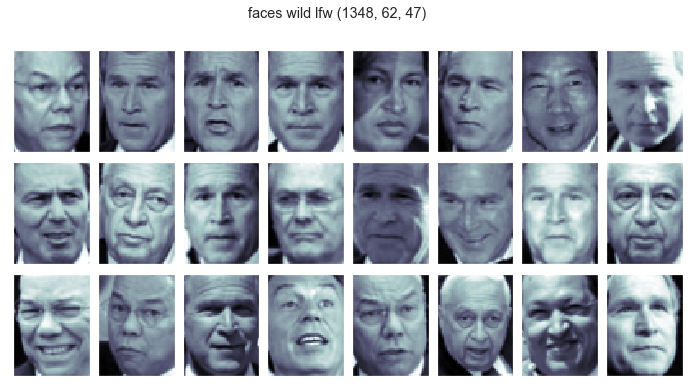

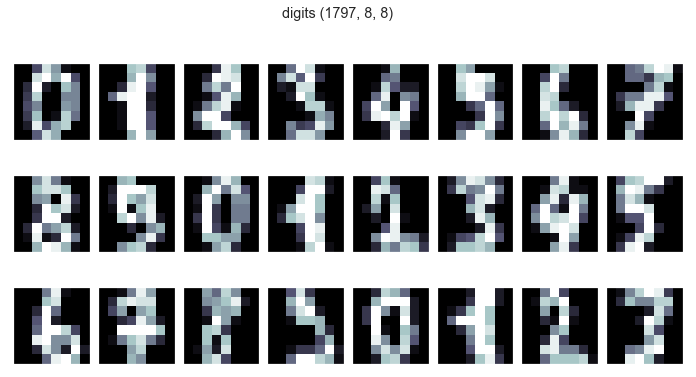

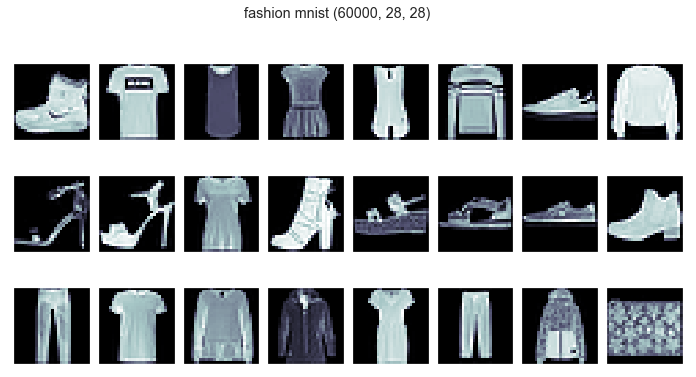

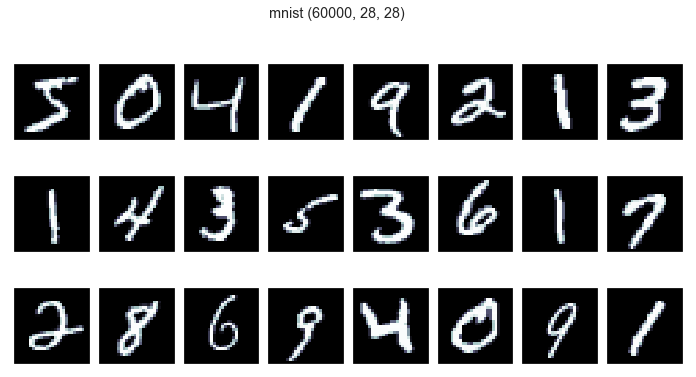

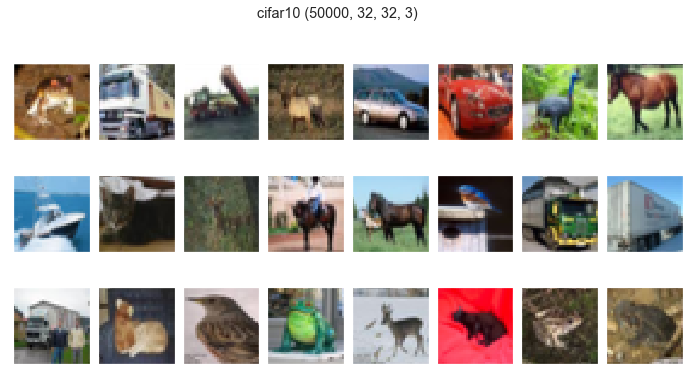

In [12]:
X_faces = data_lfw.data.reshape(-1,62,47) # 1348,62,47
Y_faces = data_lfw.target
faces_names = data_lfw.target_names
Y_faces_names = [faces_names[i] for i in Y_faces.reshape(-1)]
print_dataset(X_faces, "faces wild lfw")

X_dig = data_dig.data.reshape(-1,8,8)  # 1797,8,8 
Y_dig = data_dig.target
Y_dig_names = Y_dig
print_dataset(X_dig, "digits")

(X_fash, Y_fash), (x_test, y_test) = data_fash_mnist # 60000,28,28
fash_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
Y_fash_names = [fash_names[i] for i in Y_fash.reshape(-1)]
print_dataset(X_fash, "fashion mnist") 

(X_mnist, Y_mnist), (x_test, y_test) = data_mnist # 60000,28,28
Y_mnist_names = Y_mnist
print_dataset(X_mnist, "mnist")

(X_cif10, Y_cif10), (x_test, y_test) = data_cifar10 # 50000,32,32,3
Y_cif10 = Y_cif10.reshape(-1)
cif10_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Y_cif10_names = [cif10_names[i] for i in Y_cif10.reshape(-1)]
print_dataset(X_cif10, "cifar10")

### Dimensionality Reduction

In [13]:
from sklearn.decomposition import PCA
X = X_cif10 #X_faces, X_dig, X_fash, X_mnist, X_cif10
X_pca = X.reshape(X.shape[0],-1)
n_iter = 150
pca = PCA(n_iter)
pca.fit(X_pca)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Variance ratio (number iteration: 150) overall:  0.9287991144092265


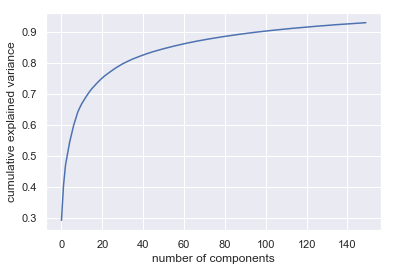

In [14]:
#print(pca.explained_variance_)
#print(pca.explained_variance_ratio_)
print("Variance ratio (number iteration: "+ str(n_iter) +") overall: ",np.sum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### PCA-Components: Eigenvalues analysis

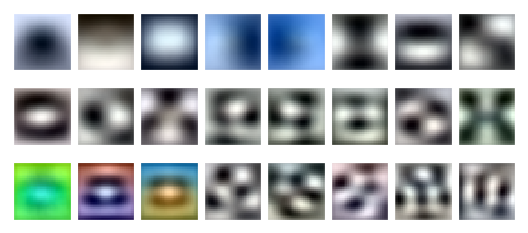

In [15]:
from sklearn.preprocessing import MinMaxScaler
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    scaler = MinMaxScaler() #0,1
    inps = scaler.fit_transform(pca.components_[i].reshape(-1,1))
    ax.imshow(inps.reshape(X.shape[1:]), cmap='bone')

### Reconstruction

In [16]:
components = pca.transform(X_pca)
projected = pca.inverse_transform(components)

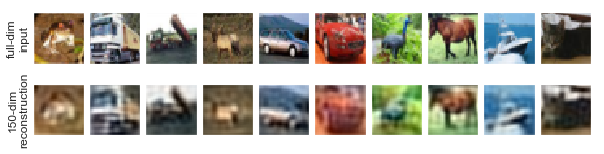

In [17]:
# Plot the results
from sklearn.preprocessing import MinMaxScaler
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    scaler = MinMaxScaler() #0,1
    inps = scaler.fit_transform(projected[i].reshape(-1,1))
    ax[0, i].imshow(X[i], cmap='binary_r')
    ax[1, i].imshow(inps.reshape(X.shape[1:]), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel(str(n_iter) + '-dim\nreconstruction');

## PCA for Visualization

In [18]:
from sklearn.decomposition import PCA
#X, Y ,Y_names = (X_fash,Y_fash,Y_fash_names)  (X_fash,Y_fash), (X_mnist,Y_mnist), (X_cif10,Y_cif10)
#X, Y ,Y_names = (X_faces,Y_faces,Y_faces_names)
X,Y,Y_names = (X_dig,Y_dig, Y_dig_names)
#X,Y,Y_names = (X_cif10,Y_cif10, Y_cif10_names)

X_pca = X.reshape(X.shape[0],-1)
n_iter = 2
pca = PCA(n_iter)
pca.fit(X_pca)
projected = pca.transform(X_pca)
print(np.sum(pca.explained_variance_ratio_))
print(X_pca.shape)
print(projected.shape)

0.28509364823604433
(1797, 64)
(1797, 2)


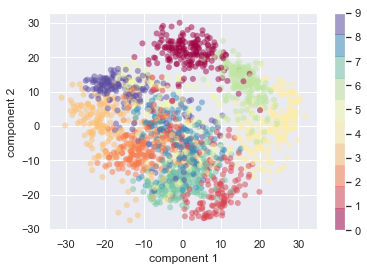

In [19]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [20]:
import plotly.graph_objects as go

# Apply Kmeans
#kmeans = KMeans(n_clusters=10)
#kmeans.fit(X)
#labels = kmeans.predict(X) #hard clustering
#centers = kmeans.cluster_centers_

# Plot using Plotly Library
xx = projected[:, 0]
yy = projected[:, 1]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x = xx,
    y = yy, 
    mode="markers",
    text = Y_names, 
    hovertemplate = 'X: %{x:.2f} <br>' +
    'Y: %{y}  <br>' +
    'Labels: %{text} <br>',
    name="Projection",
    marker=dict(
        size=15,
        color=Y.astype(np.float), #"red", #df_train["T"],             # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=0.8
        )
    )
)
fig.update_layout(hovermode="closest")
fig.show()